In [1]:
# Import libraries
import sys
import os
import json
import random
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt


In [2]:
# Load data
data = pd.read_csv('Dataset.csv')
data.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,...,Teacher Prefix,Teacher First Project Posted Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School City,School County,School District,Resource Vendor Name
0,2f5dc731f6d178951e19e45abee43c7c,5031037d03c06ceff9ba022792740b8e,dff7c4c8d4ead22c65b0b6bc9707be2a,29,Teacher-Led,Special Needs,Special Needs,Grades PreK-2,Technology,257.88,...,Ms.,2012-01-17,South Park Elementary School,urban,73.0,California,Los Angeles,Los Angeles,Los Angeles Unif Sch Dist,NaN
1,775e57c1a2d7264253fc011b8b04fc90,c9043943a34e071507d18afa2a223344,4d043e9726cc06ce36c0a7b2a7dae806,122,Teacher-Led,"Literacy & Language, Applied Learning","Literacy, Parent Involvement",Grades PreK-2,Books,167.29,...,Mr.,2009-08-18,Aspire Monarch Academy,urban,95.0,California,Oakland,Alameda,Oakland Unified School Dist,AKJ Education
2,5d5c656453577e7f34d130a6377f0b26,f0f15aa4d4af999c15b3e20c528cdf10,f33deb0bb1093084fe217003c7744994,11,Teacher-Led,"Literacy & Language, Music & The Arts","Literature & Writing, Performing Arts",Grades 3-5,Technology,464.94,...,Mrs.,2008-02-02,Mountainview Elementary School,rural,8.0,California,Saugus,Los Angeles,Saugus Union Sch District,School Specialty
3,7d9f823d78f59ce0b1e0a5633a21d742,af2a542b0f3dfa46a3db015596b381d1,3e3fc4aae13350f0bb04821bed088bad,1,Teacher-Led,Literacy & Language,Literature & Writing,Grades 3-5,Supplies,171.85,...,Mrs.,2013-01-02,Wogaman Middle School,urban,95.0,Ohio,Dayton,Montgomery,Dayton Public School District,ABC School Supply
4,8df55925b7dac804b477812d1579db7f,47d58e1df9e7d6c4a94eca77d9e30176,7ed859daf2d3024f73767d9e4c94b9f0,9,Teacher-Led,Literacy & Language,"ESL, Literacy",Grades 3-5,Technology,333.59,...,Mr.,2010-08-01,Woodview Elementary School,unknown,88.0,Texas,Houston,Harris,Spring Branch Ind Sch District,Lakeshore Learning Materials


In [12]:
data.describe()

,Teacher Project Posted Sequence,Project Cost,Label,School Percentage Free Lunch
count,579343.000000,579343.000000,579343.000000,576993.000000
mean,10.206125,685.049417,0.530760,65.567650
std,25.520956,1017.274692,0.499053,24.891809
min,1.000000,35.290000,0.000000,0.000000
25%,1.000000,315.800000,0.000000,49.000000
50%,3.000000,492.730000,1.000000,71.000000
75%,7.000000,791.300000,1.000000,87.000000
max,495.000000,255737.670000,1.000000,100.000000


In [13]:
data.columns

Index(['Project ID', 'School ID', 'Teacher ID',
       'Teacher Project Posted Sequence', 'Project Type',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Label', 'Teacher Prefix', 'Teacher First Project Posted Date',
       'School Name', 'School Metro Type', 'School Percentage Free Lunch',
       'School State', 'School City', 'School County', 'School District',
       'Resource Vendor Name'],
      dtype='object')

In [14]:
data[data.duplicated()]

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Label,Teacher Prefix,Teacher First Project Posted Date,School Name,School Metro Type,School Percentage Free Lunch,School State,School City,School County,School District,Resource Vendor Name


In [ ]:
# No duplicates.
# 579343 unique projects

In [15]:
data.count()

Project ID                           579343
School ID                            579343
Teacher ID                           579343
Teacher Project Posted Sequence      579343
Project Type                         579343
Project Subject Category Tree        579330
Project Subject Subcategory Tree     579330
Project Grade Level Category         579343
Project Resource Category            579326
Project Cost                         579343
Project Posted Date                  579343
Project Expiration Date              579342
Label                                579343
Teacher Prefix                       579316
Teacher First Project Posted Date    579340
School Name                          579342
School Metro Type                    579342
School Percentage Free Lunch         576993
School State                         579342
School City                          575604
School County                        579339
School District                      579342
Resource Vendor Name            

In [16]:
# Check for missing data
data.isnull().sum()

Project ID                               0
School ID                                0
Teacher ID                               0
Teacher Project Posted Sequence          0
Project Type                             0
Project Subject Category Tree           13
Project Subject Subcategory Tree        13
Project Grade Level Category             0
Project Resource Category               17
Project Cost                             0
Project Posted Date                      0
Project Expiration Date                  1
Label                                    0
Teacher Prefix                          27
Teacher First Project Posted Date        3
School Name                              1
School Metro Type                        1
School Percentage Free Lunch          2350
School State                             1
School City                           3739
School County                            4
School District                          1
Resource Vendor Name                 21834
dtype: int6

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579343 entries, 0 to 579342
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Project ID                         579343 non-null  object        
 1   School ID                          579343 non-null  object        
 2   Teacher ID                         579343 non-null  object        
 3   Teacher Project Posted Sequence    579343 non-null  int64         
 4   Project Type                       579343 non-null  object        
 5   Project Subject Category Tree      579330 non-null  object        
 6   Project Subject Subcategory Tree   579330 non-null  object        
 7   Project Grade Level Category       579343 non-null  object        
 8   Project Resource Category          579326 non-null  object        
 9   Project Cost                       579343 non-null  float64       
 10  Project Posted Date 

<AxesSubplot:xlabel='Active Duration', ylabel='Count'>

<Figure size 640x480 with 0 Axes>

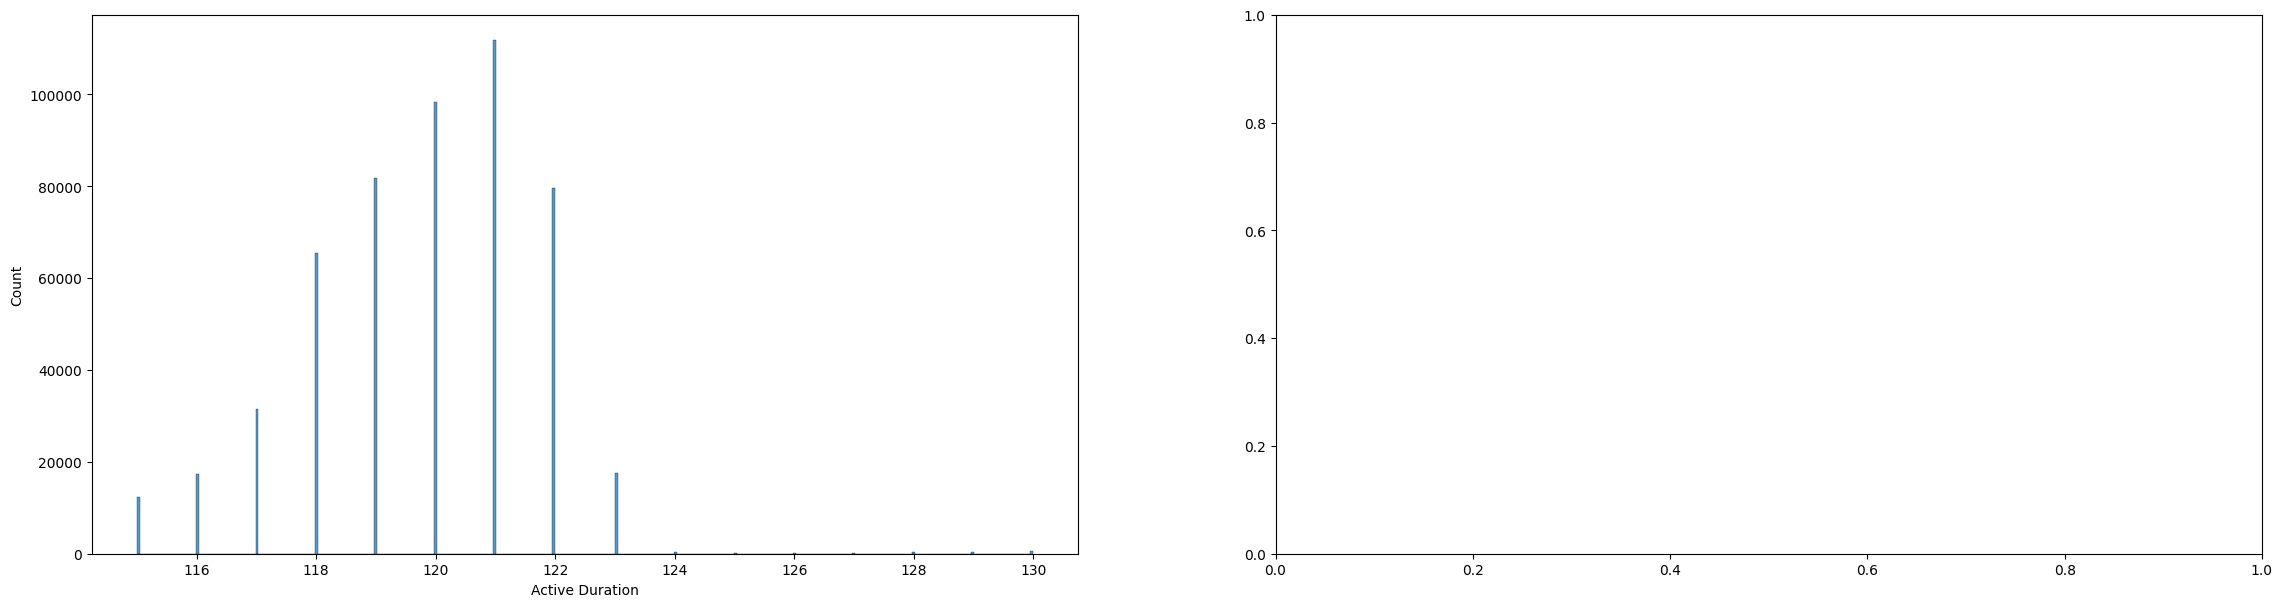

In [25]:
# Visualizing the expiration date - posted date duration
# Convert to datetime
data["Project Posted Date"]=pd.to_datetime(data["Project Posted Date"])
data["Project Expiration Date"]=pd.to_datetime(data["Project Expiration Date"])


data["Active Duration"] = data.loc[:,"Project Expiration Date"] - data.loc[:,"Project Posted Date"]
data["Active Duration"] = data["Active Duration"]/ np.timedelta64(1, 'D')
plt.clf()
f, axes = plt.subplots(1, 2,figsize=(28,7))

a=0.01
q1 = data["Active Duration"].quantile(0.1)
q3 = data["Active Duration"].quantile(1-a)
mask = data["Active Duration"].between(q1, q3, inclusive='both')
iqr = data.loc[mask, "Active Duration"]
sns.histplot(iqr, ax=axes[0])

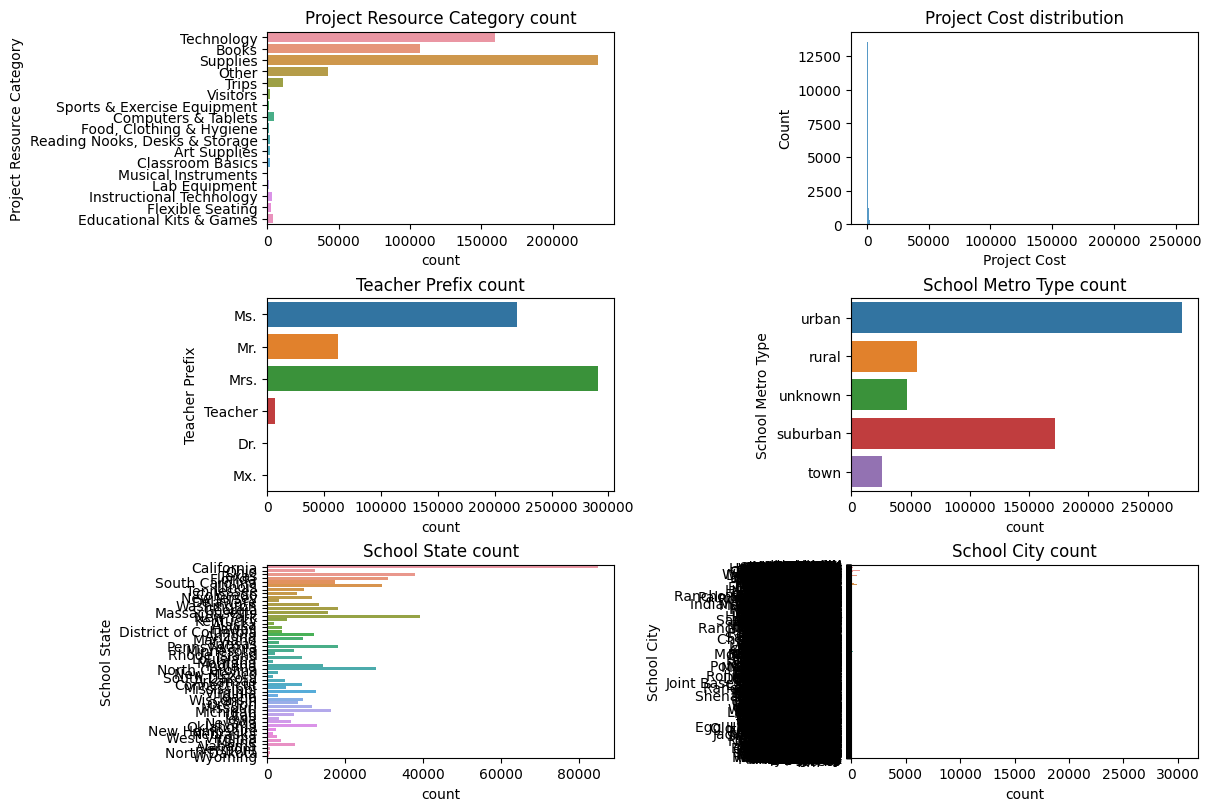

In [19]:
def plotting_features(data):
    
    '''
    Return to distribution of numerical features and count of 
    categorical features, specific features will ignore them,
    because they do not give us any meaning.
    
    '''
 
    ignored_cols = ['Project ID', 'School ID', 'Teacher ID',
       'Teacher Project Posted Sequence', 'Project Type',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Posted Date', 'Project Expiration Date',
       'Label', 'Teacher First Project Posted Date',
       'School Name', 'School Percentage Free Lunch',
       'School County', 'School District',
       'Resource Vendor Name']
    cols = [ col for col in data.columns if col not in ignored_cols]
 
    nrows= int(np.ceil(len(cols)/2))
    fig, ax = plt.subplots(
                        nrows=nrows, 
                        ncols=2, 
                        figsize=(12,8),   
                        constrained_layout=True)
    ax = ax.ravel()
 
    for i in range(len(cols)):
        if (data[cols[i]].dtypes == 'object') | (len(data[cols[i]].unique().tolist()) < 10): 
            sns.countplot(y = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} count')
 
        else:
            sns.histplot(x = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} distribution');
            
plotting_features(data)

<Figure size 640x480 with 0 Axes>

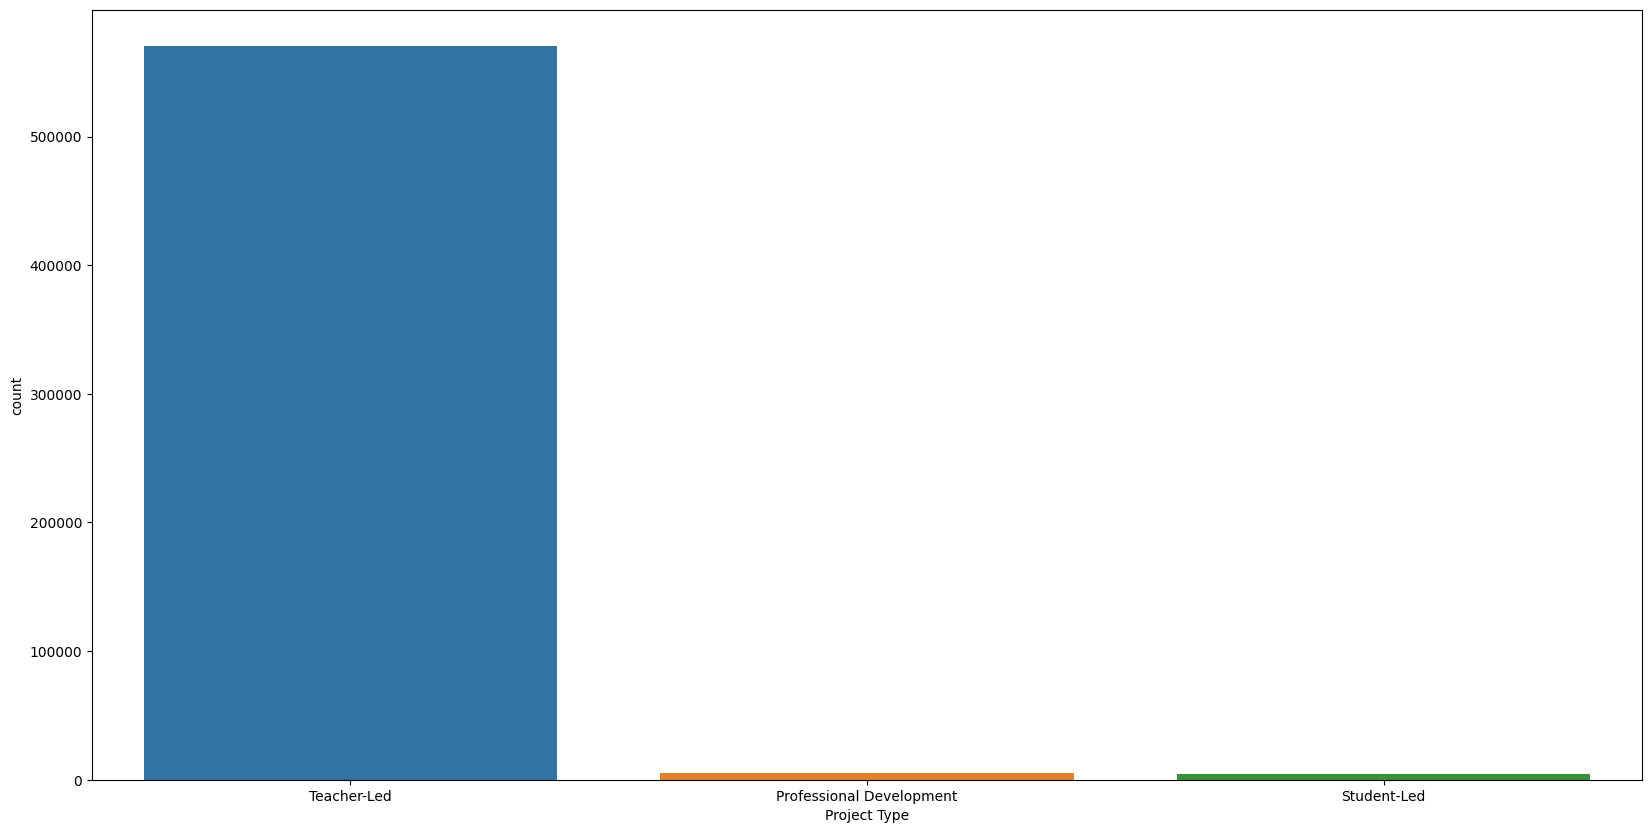

In [3]:
plt.clf()
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Project Type', data=data)

<Figure size 640x480 with 0 Axes>

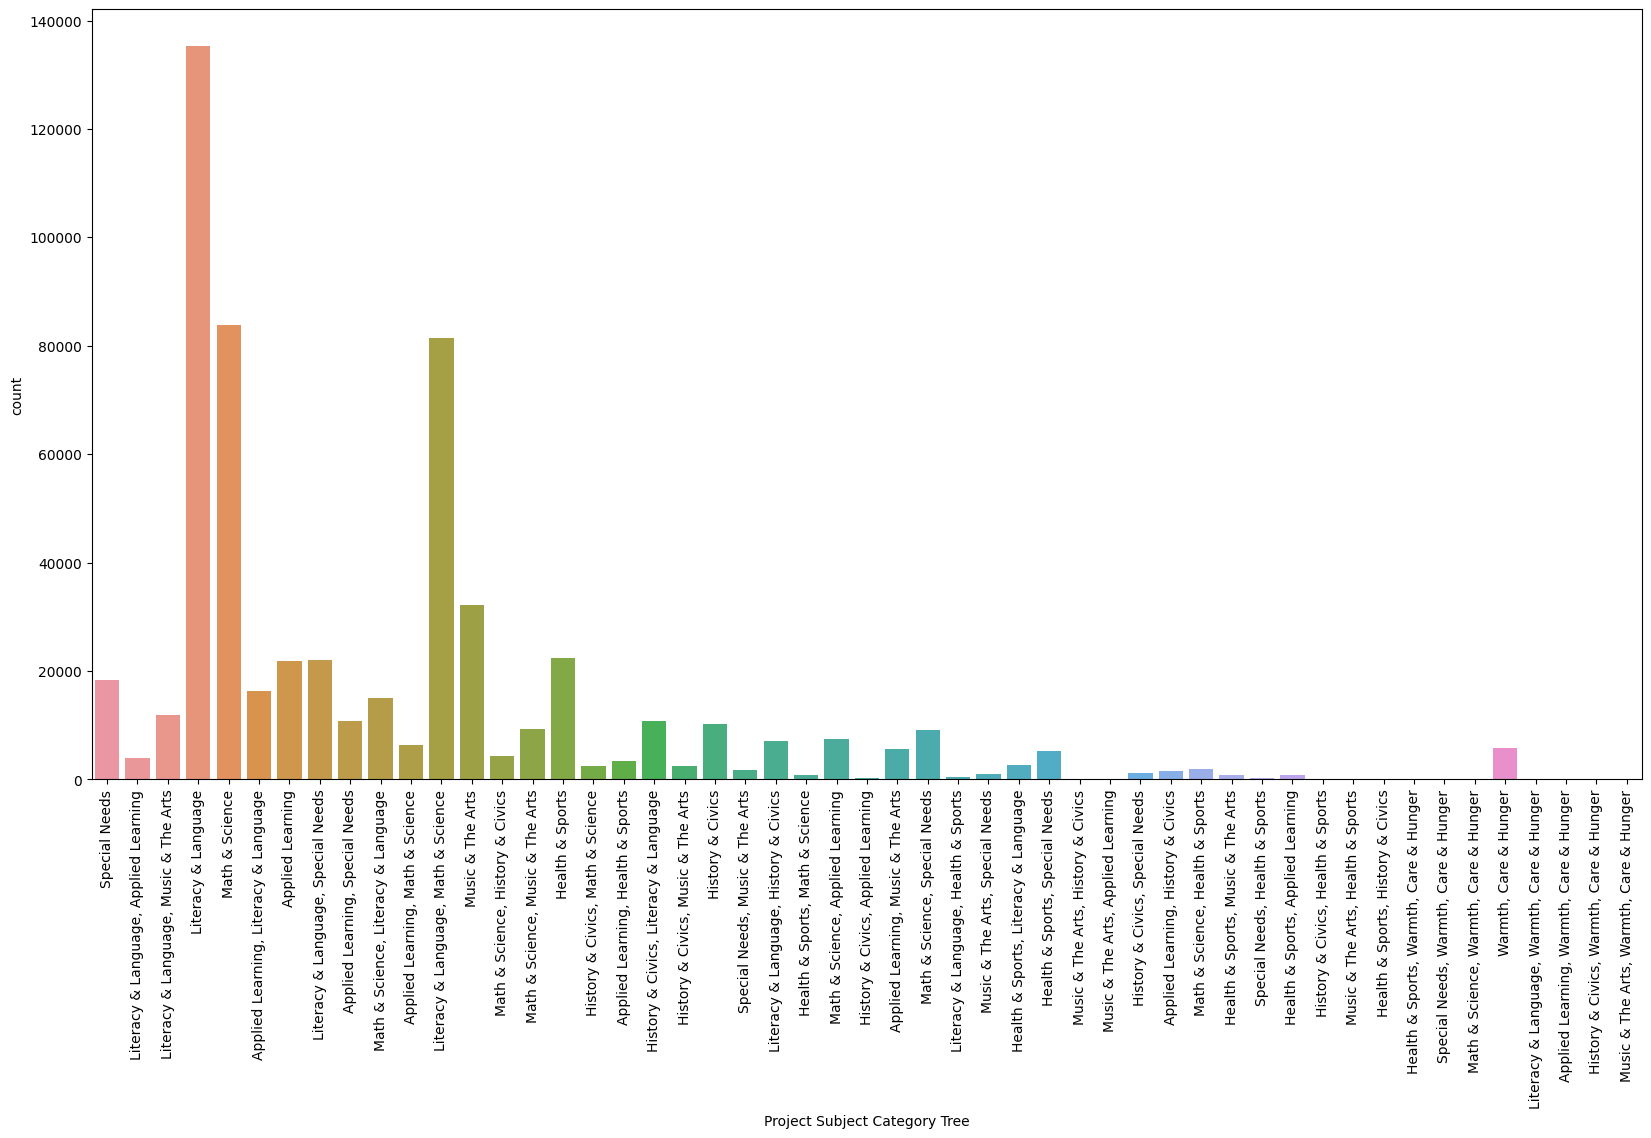

In [5]:
plt.clf()
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax = sns.countplot(x='Project Subject Category Tree', data=data)

<Figure size 640x480 with 0 Axes>

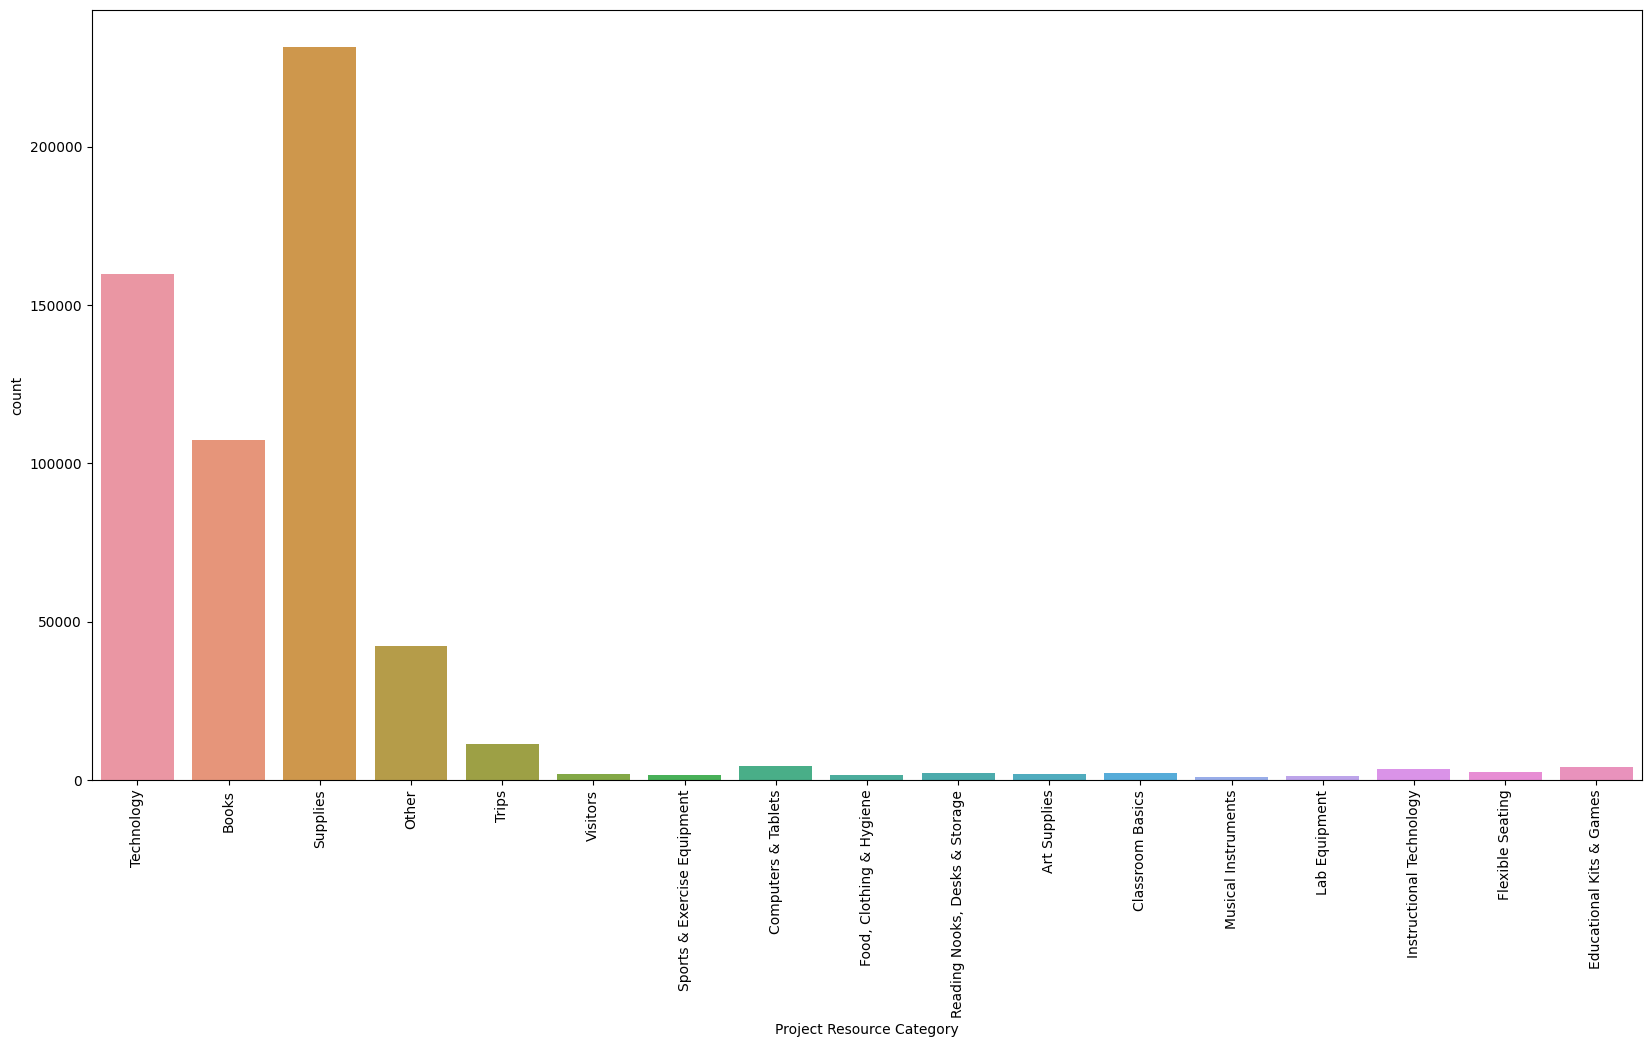

In [6]:
plt.clf()
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax = sns.countplot(x='Project Resource Category', data=data)

<Figure size 640x480 with 0 Axes>

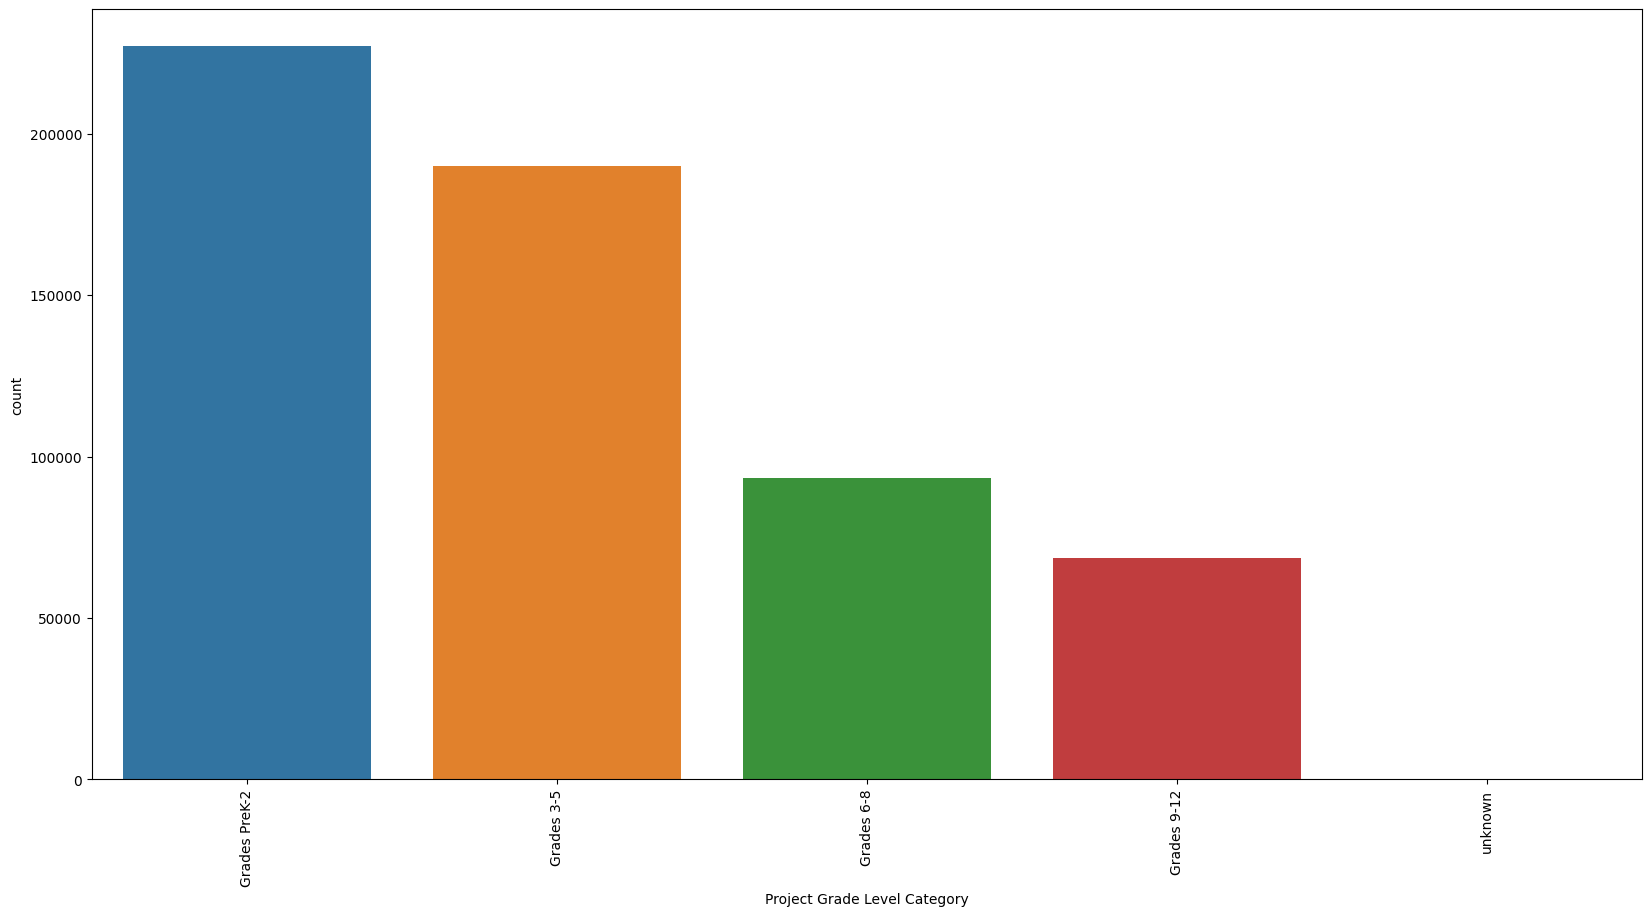

In [7]:
plt.clf()
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
ax = sns.countplot(x='Project Grade Level Category', data=data)

<AxesSubplot:xlabel='Teacher Project Posted Sequence', ylabel='Count'>

<Figure size 640x480 with 0 Axes>

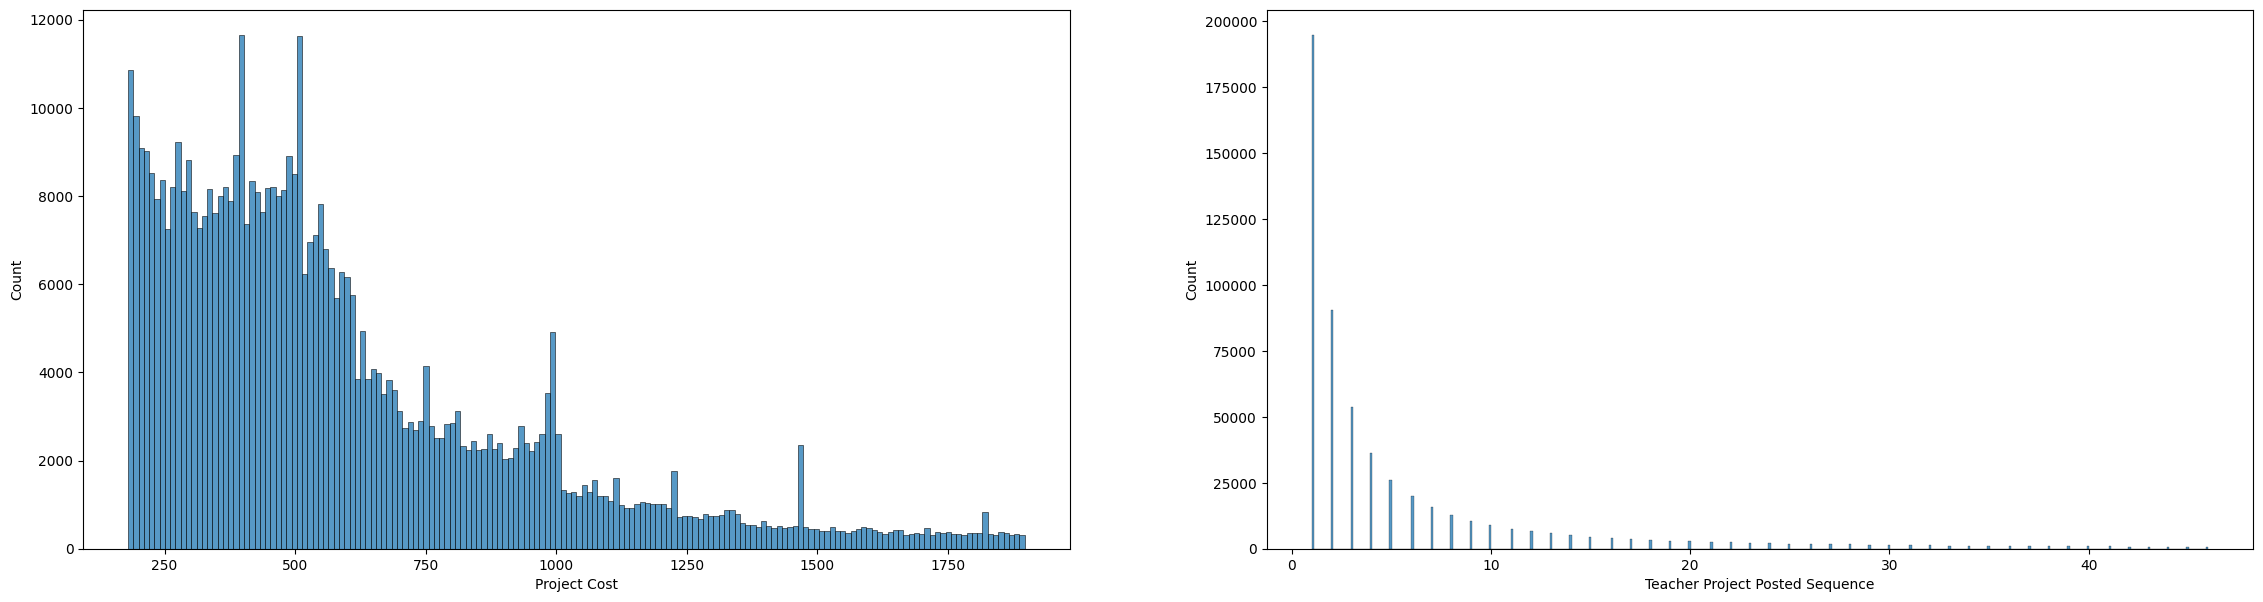

In [10]:
plt.clf()
f, axes = plt.subplots(1, 2,figsize=(28,7))

a=0.05
q1 = data["Project Cost"].quantile(a)
q3 = data["Project Cost"].quantile(1-a)
mask = data["Project Cost"].between(q1, q3, inclusive='both')
iqr = data.loc[mask, "Project Cost"]
sns.histplot(iqr, ax=axes[0])

a=0.05
q1 = data["Teacher Project Posted Sequence"].quantile(0)
q3 = data["Teacher Project Posted Sequence"].quantile(1-a)
mask = data["Teacher Project Posted Sequence"].between(q1, q3, inclusive='both')
iqr = data.loc[mask, "Teacher Project Posted Sequence"]
sns.histplot(iqr, ax=axes[1])

<AxesSubplot:ylabel='Label'>

<Figure size 640x480 with 0 Axes>

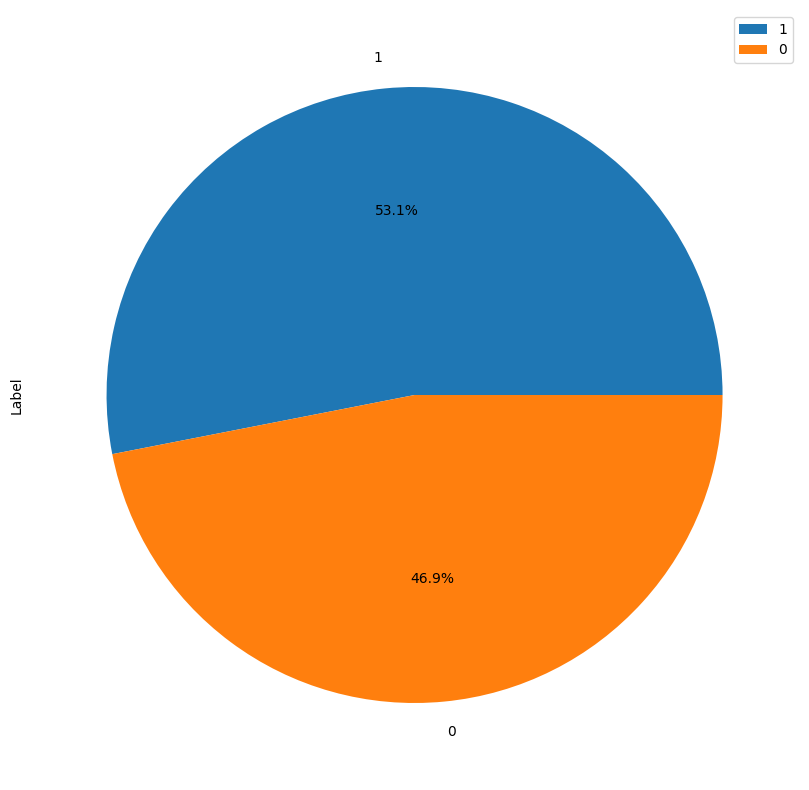

In [12]:
plt.clf()
# Visualizing the variation oflabels
pcs = data['Label'].value_counts()
df2 = pd.DataFrame({'Label': pcs})
df2.plot.pie(y='Label', figsize=(10,10), autopct='%1.1f%%')

<AxesSubplot:xlabel='School Percentage Free Lunch', ylabel='Count'>

<Figure size 640x480 with 0 Axes>

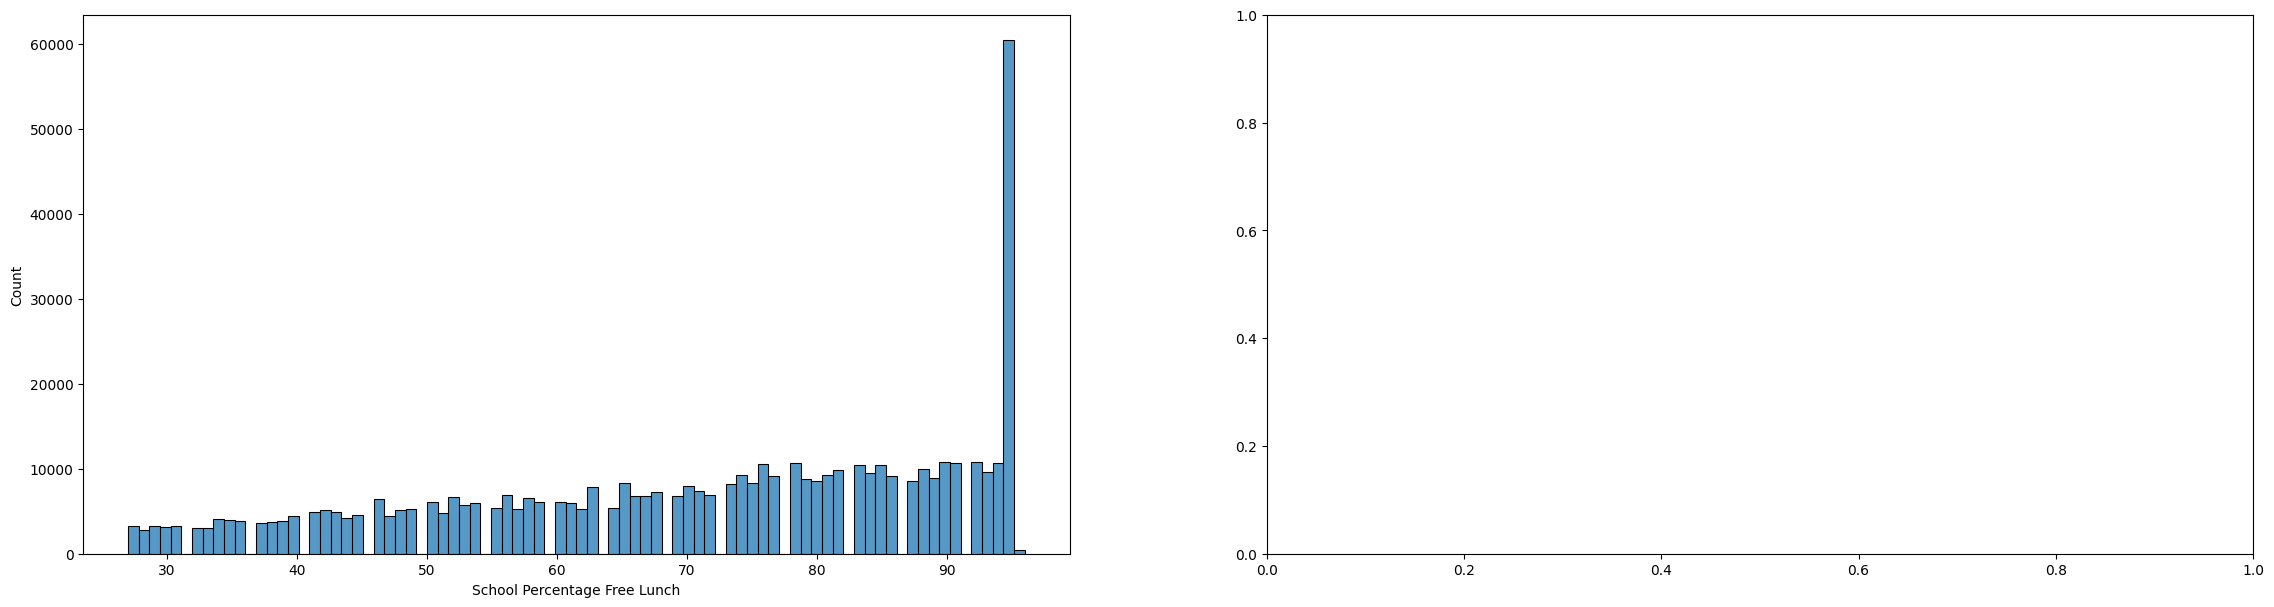

In [15]:
plt.clf()
f, axes = plt.subplots(1, 2,figsize=(28,7))

a=0.01
q1 = data["School Percentage Free Lunch"].quantile(0.1)
q3 = data["School Percentage Free Lunch"].quantile(1-a)
mask = data["School Percentage Free Lunch"].between(q1, q3, inclusive='both')
iqr = data.loc[mask, "School Percentage Free Lunch"]
sns.histplot(iqr, ax=axes[0])

<Figure size 640x480 with 0 Axes>

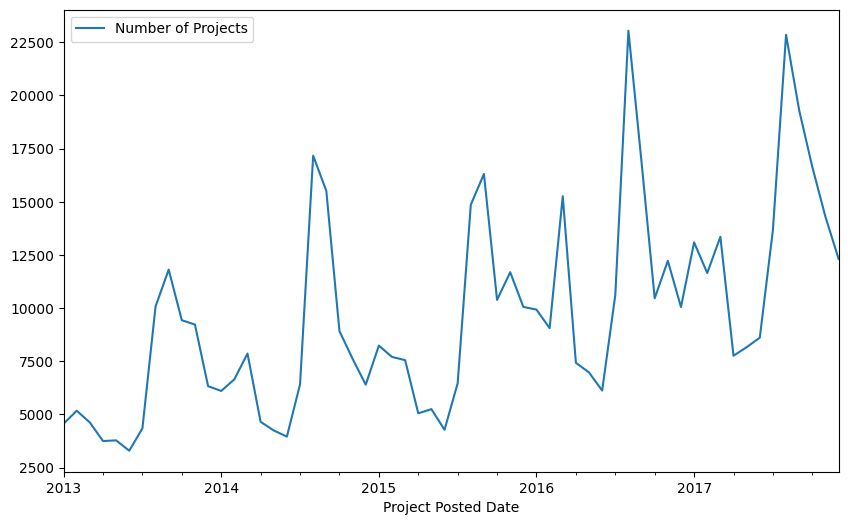

In [17]:
# Time-based analysis
# Number of projects over the years
# Number of projects created per month
data["Project Posted Date"]=pd.to_datetime(data["Project Posted Date"])
projects_per_month = data.groupby(data["Project Posted Date"].dt.to_period('M')).size()

plt.clf()
plt.figure(figsize=(10, 6))
projects_per_month.plot(kind='line', label='Number of Projects')
plt.legend()

<Figure size 640x480 with 0 Axes>

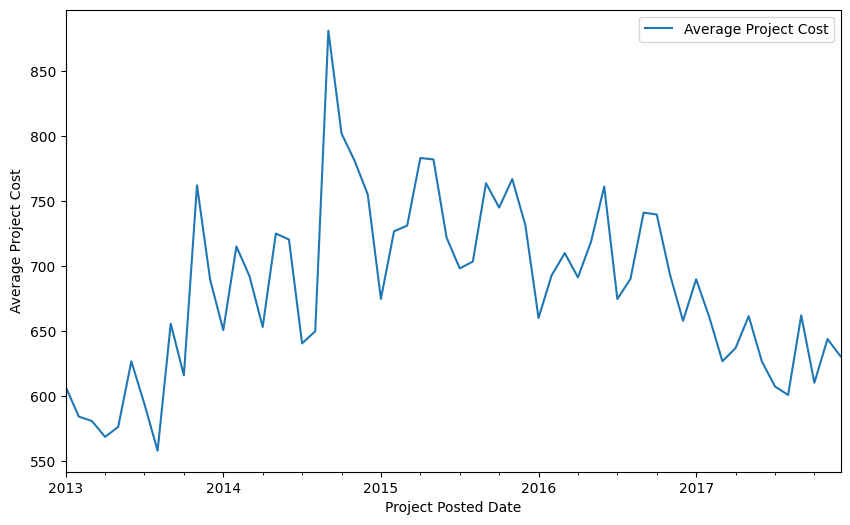

In [18]:
# Average project cost variation across months (quarterly)
data["Project Posted Date"]=pd.to_datetime(data["Project Posted Date"])
avg_project_cost_variation_per_month = data.groupby(data["Project Posted Date"].dt.to_period('M'))["Project Cost"].mean()

# Plot the number of projects per quarter
plt.clf()
plt.figure(figsize=(10, 6))
avg_project_cost_variation_per_month.plot(kind='line', label='Average Project Cost')
plt.xlabel('Project Posted Date')
plt.ylabel('Average Project Cost')
plt.legend()